<a href="https://colab.research.google.com/github/DeepHiveMind/80-days-study-guide-to-Deep-Learning-Reinforced-Learning-and-Deep-Reinforced-Learning/blob/master/Model_Averaging_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)

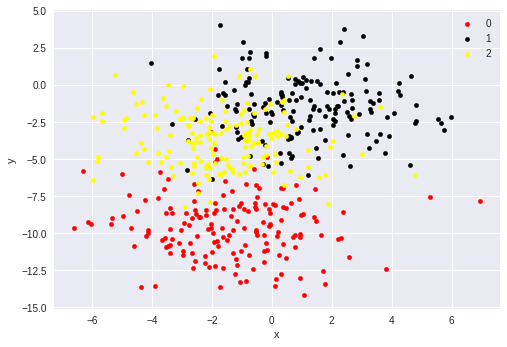

In [9]:
from matplotlib import pyplot
import pandas as pd
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'black', 2:'yellow'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
  group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [0]:
y

In [0]:
X

In [13]:
from keras.utils import np_utils
y = np_utils.to_categorical(y)

Using TensorFlow backend.


In [0]:
y

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.7, random_state = 1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
_model = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100)

In [18]:
_, train_acc = model.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.780, Test: 0.743


In [27]:
def evaluate_model(trainX, trainy, testX, testy):
  model = Sequential()
  model.add(Dense(25, input_dim=2, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(trainX, trainy, epochs=100, verbose=0)
  _, test_acc = model.evaluate(testX, testy, verbose=0)
  return test_acc
n_repeats = 10
scores = list()
for _ in range(n_repeats):
  score = evaluate_model(X_train, Y_train, X_test, Y_test)
  print('> %.3f' % score)
  scores.append(score)
from statistics import *
print('Scores Mean: %.3f, Standard Deviation: %.3f' % (mean(scores), stdev(scores)))

> 0.737
> 0.777
> 0.769
> 0.757
> 0.751
> 0.737
> 0.783
> 0.777
> 0.754
> 0.746
Scores Mean: 0.759, Standard Deviation: 0.017


In [0]:
#make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
  #make predictions
  yhats = [model.predict(testX) for model in members] 
  yhats = array(yhats)
  #sum across ensemble members
  summed = numpy.sum(yhats, axis=0)
  #argmax across classes
  result = argmax(summed, axis=1)
  return result

1
> 0.747
2
> 0.760
3
> 0.767
4
> 0.767
5
> 0.767
Average Accuracy Score :  0.7666666666666667


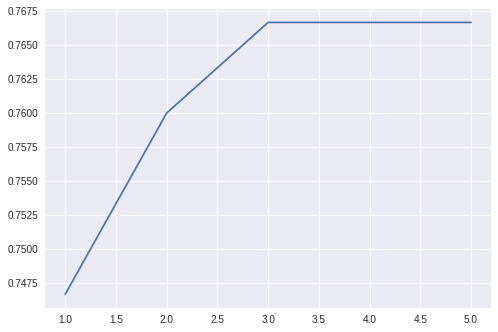

In [38]:
from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import numpy
from numpy import array
from numpy import argmax
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

def fit_model(trainX, trainy):
  model = Sequential()
  model.add(Dense(20, input_dim=2, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(trainX, trainy, epochs=100, verbose=0)
  return model

#make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
  #make predictions
  yhats = [model.predict(testX) for model in members]
  yhats = array(yhats)
  #sum across ensemble members
  summed = numpy.sum(yhats, axis=0)
  #argmax across classes
  result = argmax(summed, axis=1)
  return result

#evaluate a specific number of members in an ensemble
def evaluate_n_members(members, n_members, testX, testy):
  #select a subset of members
  subset = members[:n_members] 
  print(len(subset))
  #make prediction
  yhat = ensemble_predictions(subset, testX)
  #calculate accuracy
  return accuracy_score(testy, yhat)

X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)
Y_train = to_categorical(Y_train)

#fit all models
n_members = 5
members = [fit_model(X_train, Y_train) for _ in range(n_members)] #evaluate different numbers of ensembles
scores = list()

for i in range(1, n_members+1):
  score = evaluate_n_members(members, i, X_test, Y_test)
  print('> %.3f' % score)
  scores.append(score)

print("Average Accuracy Score : ", numpy.mean(score))
#plot score vs number of ensemble members
x_axis = [i for i in range(1, n_members+1)] 
pyplot.plot(x_axis, scores)
pyplot.show()